In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [ ]:
# Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite jų vidutinį atlyginimą stulpeline diagrama (bar arba barh).

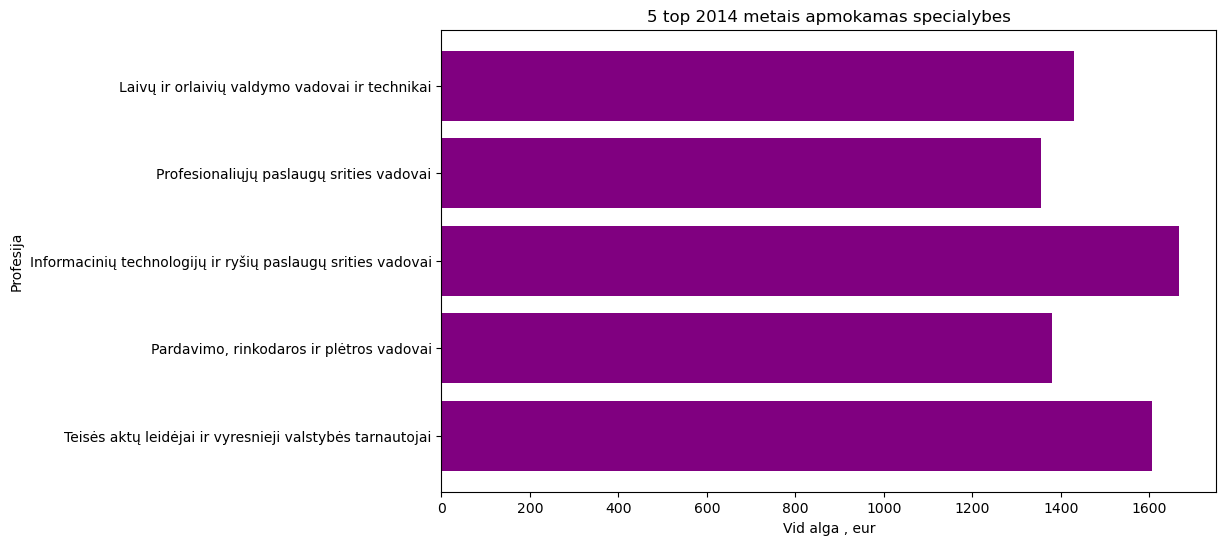

In [5]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
query="""select p.profesija, d.vid_alga
from 
    (select profesija, round(avg(bdu_spalio/3.4528), 2) as vid_alga
     from DUS2014N
     group by profesija
     order by vid_alga desc
     limit 5) as d
join profesijos as p 
on p.kodas = d.profesija;"""

C.execute(query)
results = C.fetchall()

profesijos, vid_alga= list(map(list, zip(*results)))

plt.figure(figsize=(10, 6))
plt.barh(profesijos, vid_alga, color='purple')

plt.xlabel('Vid alga , eur')
plt.ylabel('Profesija')
plt.title('5 top 2014 metais apmokamas specialybes')



plt.show()

[(133, 1668.21, Decimal('2147.25'), 'Informacinių technologijų ir ryšių paslaugų srities vadovai', 133), (111, 1606.34, Decimal('1709.48'), 'Teisės aktų leidėjai ir vyresnieji valstybės tarnautojai', 111), (315, 1428.77, Decimal('2267.91'), 'Laivų ir orlaivių valdymo vadovai ir technikai', 315), (122, 1380.55, Decimal('1818.60'), 'Pardavimo, rinkodaros ir plėtros vadovai', 122), (134, 1355.07, Decimal('1662.63'), 'Profesionaliųjų paslaugų srities vadovai', 134), (511, 741.67, Decimal('794.21'), 'Kelionių palydovai, konduktoriai ir kelionių vadovai', 511), (835, 722.23, Decimal('1005.95'), 'Laivų įgulų nariai ir giminiškų profesijų darbininkai', 835), (311, 713.01, Decimal('987.54'), 'Fizinių mokslų ir inžinerijos technikai', 311), (722, 711.22, Decimal('944.78'), 'Kalviai, įrankininkai ir giminiškų profesijų darbininkai', 722), (721, 705.42, Decimal('991.06'), 'Skardininkai, metalinių konstrukcijų montuotojai, metalo liejikai, suvirintojai ir giminiškų profesijų darbininkai', 721), (51

C:\Users\Batia\AppData\Local\Temp\ipykernel_27172\1356836221.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


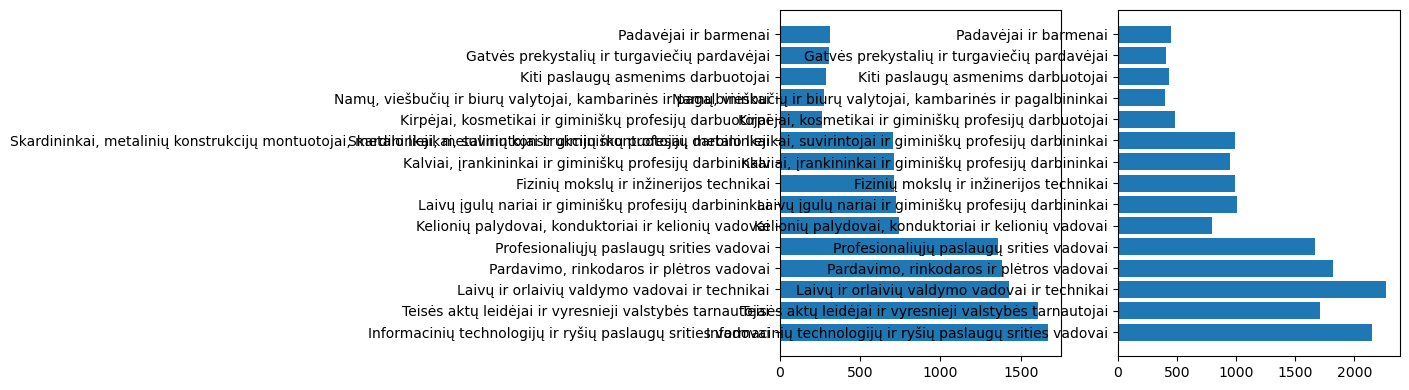

In [47]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()


query="""select * from(
(select profesija, round(avg(bdu_spalio/3.4528),2) as max from DUS2014N
group by profesija
order by max desc
limit 5)
union all
(select profesija, round(avg(bdu_spalio/3.4528),2) as vid
from DUS2014N
group by profesija
having round(avg(bdu_spalio/3.4528),2) between (0.9*(select round(avg(bdu_spalio/3.4528),2) from DUS2014N)) and (1.1*(select round(avg(bdu_spalio/3.4528),2) from DUS2014N))
order by vid desc
limit 5)
union all
(select profesija, round(avg(bdu_spalio/3.4528),2) as min from DUS2014N
group by profesija
order by min asc
limit 5)) as t1
join
(select profesija, round(avg(bdu_spalio),2) as max from DUS2018N
group by profesija) as p1
using (profesija)
join
(select profesija, Kodas from profesijos
group by profesija) as p2
on p1.profesija=p2.Kodas;

"""
C.execute(query)
results = C.fetchall()
print(results)
pout(results)
profesijos, algos14, algos18, profesijos1, kodas= list(map(list, zip(*results)))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4.5))

ax1.barh(profesijos1, algos14)

ax2.barh(profesijos1, algos18)

fig.tight_layout()

plt.show()


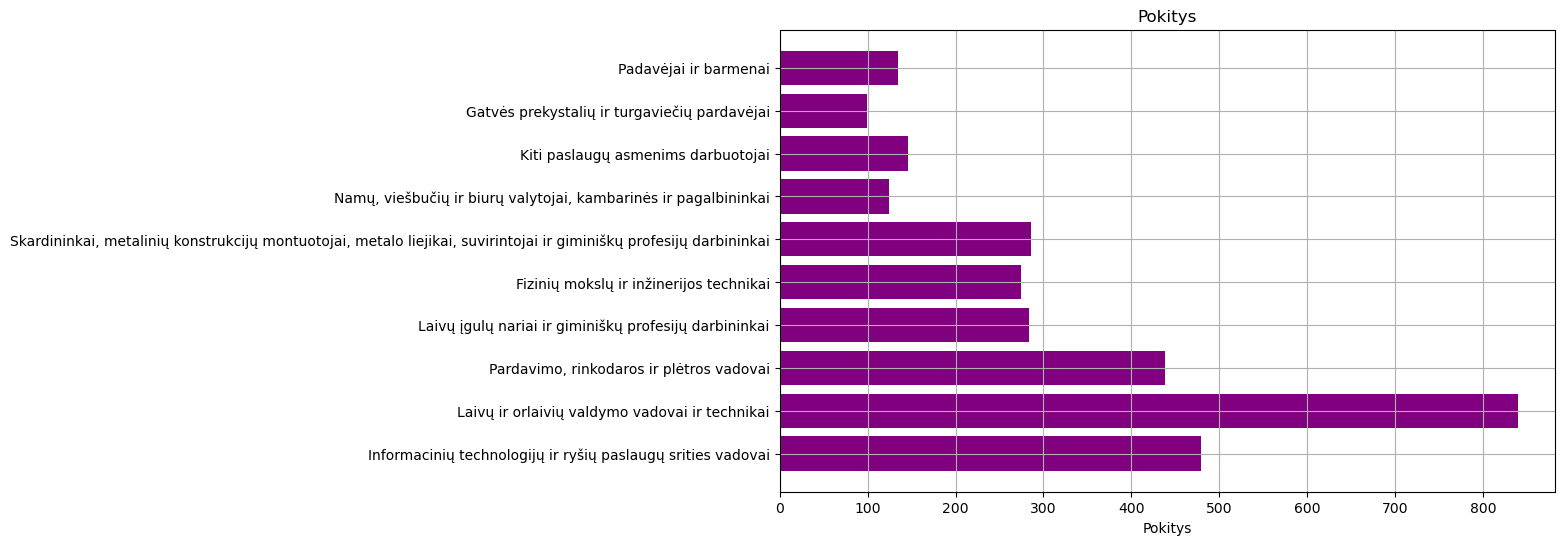

: 

In [48]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()

query="""select p2.profesija, 
       t2014.salary_2014, 
       t2018.salary_2018,
       round(t2018.salary_2018 - t2014.salary_2014, 2) as salary_change
from 
(
    
    (
        select profesija, round(avg(bdu_spalio/3.4528),2) as salary_2014
        from DUS2014N
        group by profesija
        order by salary_2014 desc
        limit 5
    )
    union all
    (
        select profesija, round(avg(bdu_spalio/3.4528),2) as salary_2014
        from DUS2014N
        group by profesija
        having round(avg(bdu_spalio/3.4528),2) between 
               (0.9*(select round(avg(bdu_spalio/3.4528),2) from DUS2014N)) and 
               (1.1*(select round(avg(bdu_spalio/3.4528),2) from DUS2014N))
        order by salary_2014 desc
        limit 5
    )
    union all
    (
        select profesija, round(avg(bdu_spalio/3.4528),2) as salary_2014
        from DUS2014N
        group by profesija
        order by salary_2014 asc
        limit 5
    )
) as t2014
join 
(
    
    (
        select profesija, round(avg(bdu_spalio),2) as salary_2018
        from DUS2018N
        group by profesija
        order by salary_2018 desc
        limit 5
    )
    union all
    (
        select profesija, round(avg(bdu_spalio),2) as salary_2018
        from DUS2018N
        group by profesija
        having round(avg(bdu_spalio),2) between 
               (0.9*(select round(avg(bdu_spalio),2) from DUS2018N)) and 
               (1.1*(select round(avg(bdu_spalio),2) from DUS2018N))
        order by salary_2018 desc
        limit 5
    )
    union all
    (
        select profesija, round(avg(bdu_spalio),2) as salary_2018
        from DUS2018N
        group by profesija
        order by salary_2018 asc
        limit 5
    )
) as t2018
on t2014.profesija = t2018.profesija


join
(
    select profesija, Kodas 
    from profesijos
    group by profesija
) as p2
on t2018.profesija = p2.Kodas;"""

C.execute(query)
results = C.fetchall()

profesijos, algos14, algos18, pokitys= list(map(list, zip(*results)))

# fig, ax1 = plt.subplots( figsize=(8,4.5))

# ax1.barh(profesijos, pokitys)

# # ax2.barh(profesijos, algos18)

# fig.tight_layout()

# plt.show()


plt.figure(figsize=(10, 6))
plt.barh(profesijos, pokitys, color='purple')
plt.xlabel('Pokitys')
plt.title('Pokitys')
plt.grid(True)
plt.show()

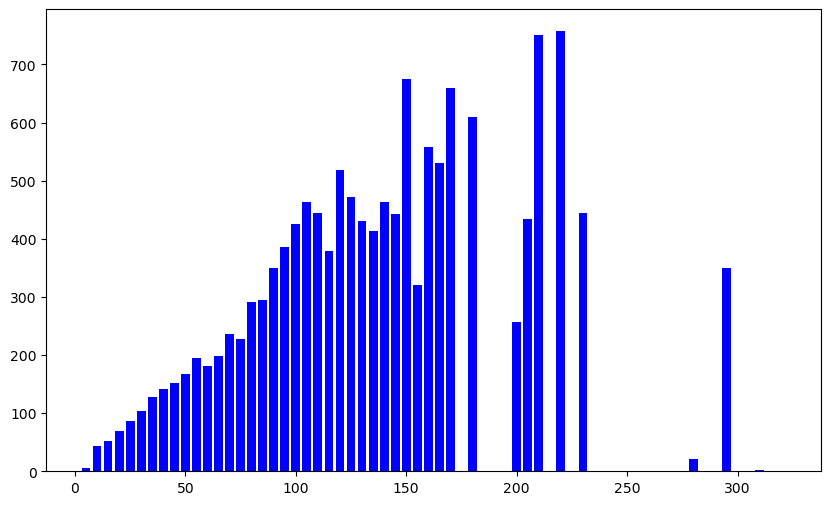

In [36]:
query="""select floor(plotas / 5) * 5 as plotas_intervalas,  round(avg(kaina), 2) as vidutine_kaina       
from aruodas
group by plotas_intervalas
order by plotas_intervalas;"""

C.execute(query)
results = C.fetchall()

plotas_intervalas, vidutine_kaina= list(map(list, zip(*results)))

plt.figure(figsize=(10, 6))
plt.bar(plotas_intervalas, vidutine_kaina, width=4, color='blue')

fig.tight_layout()

plt.show()

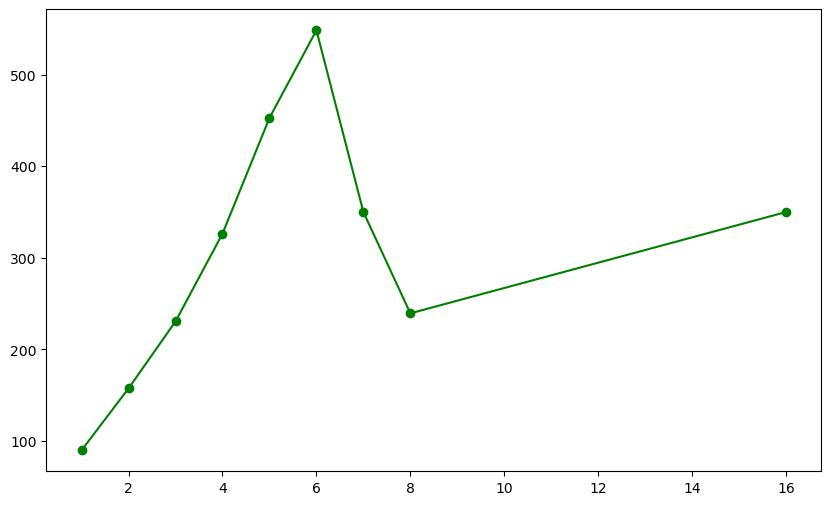

In [38]:
query="""select round(avg(kaina),2) as vid_kaina , kambariai from aruodas
 group by kambariai
 order by kambariai;"""

C.execute(query)
results = C.fetchall()

vid_kainos,kambariu_kiekis= list(map(list, zip(*results)))

plt.figure(figsize=(10, 6))

plt.plot(kambariu_kiekis, vid_kainos, marker='o', linestyle='-', color='g')

plt.show()

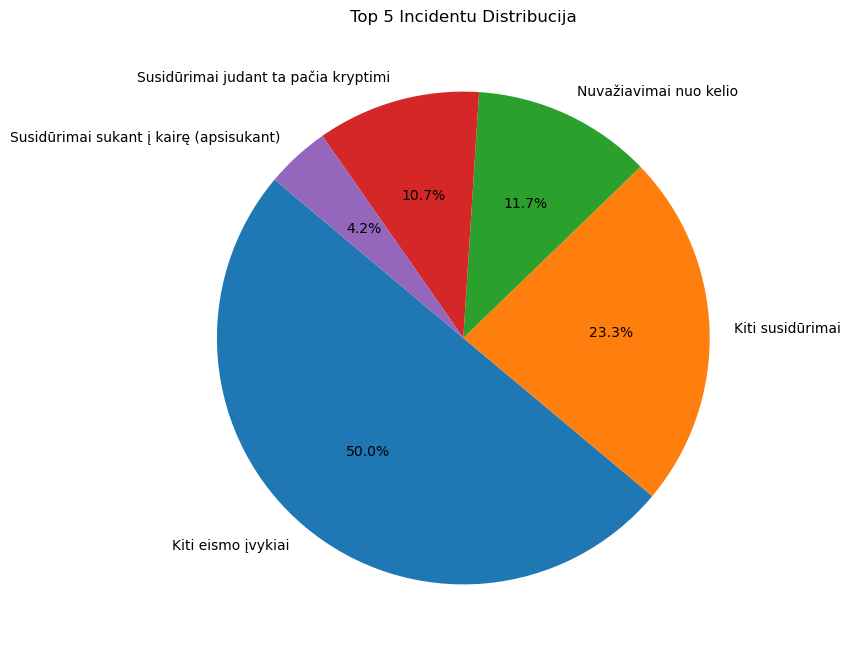

In [40]:
query="""select schema1, count(*) from EismIvyk2020
group by schema1
order by count(*) desc
limit 5;"""

C.execute(query)
results = C.fetchall()

incidents,  counts= list(map(list, zip(*results)))

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=incidents, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab10').colors)
plt.title('Top 5 Incidentu Distribucija')
plt.show()

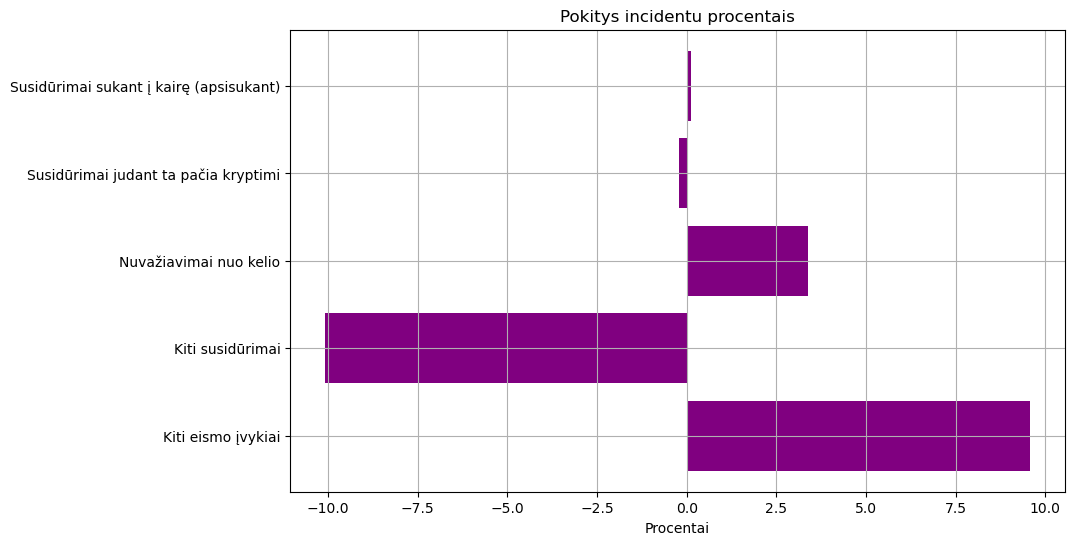

In [43]:

DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()






query="""select t2021.incident,
       t2020.count as count_2020,
       t2021.count as count_2021,
       round(((t2021.count - t2020.count) / t2020.count) * 100, 2) as percentage_change
from (
    select schema1 as incident, count(*) as count
    from EismIvyk2020
    where schema1 in ('Kiti eismo įvykiai', 'Kiti susidūrimai', 'Nuvažiavimai nuo kelio', 'Susidūrimai judant ta pačia kryptimi', 'Susidūrimai sukant į kairę (apsisukant)')
    group by schema1
) as t2020
join (
    select schema1 as incident, count(*) as count
    from EismIvyk2021
    where schema1 in ('Kiti eismo įvykiai', 'Kiti susidūrimai', 'Nuvažiavimai nuo kelio', 'Susidūrimai judant ta pačia kryptimi', 'Susidūrimai sukant į kairę (apsisukant)')
    group by schema1
) as t2021
on t2020.incident = t2021.incident;"""


C.execute(query)
results = C.fetchall()

incident,  count_2020, count_2021, percentage_change= list(map(list, zip(*results)))

plt.figure(figsize=(10, 6))
plt.barh(incident, percentage_change, color='purple')
plt.xlabel('Procentai')
plt.title('Pokitys incidentu procentais')
plt.grid(True)
plt.show()